```MSSV```: 19521386

```Name```: Bui Tri Dung

```Problem```: EdgeDetection

#Get images from drive

In [ ]:
from google.colab import drive  
from google.colab.patches import cv2_imshow
import os
import cv2 as cv

In [ ]:
drive.mount('/gdrive') 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
dir_monhoc = '/gdrive/MyDrive/CS231.L22.KHCL'
dir_baitap= os.path.join(dir_monhoc, 'EdgeDetection')

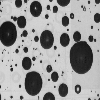

In [ ]:
path_filename = os.path.join(dir_baitap, 'particles.bmp')
img = cv.imread(path_filename, 0)
cv2_imshow(cv.resize(img, (100, 100)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
kernels_x = np.array([[-1, 0, 1],
                      [-2, 0, 2], 
                      [-1, 0, 1]])

kernels_y = kernels_x.T

Gx = cv.filter2D(img, -1, kernels_x)
Gy = cv.filter2D(img, -1, kernels_y)
G1 = np.sqrt(np.square(Gx * 1.0) + np.square(Gy * 1.0))

In [ ]:
Gu = cv.filter2D(img, -1, -kernels_x)
Gv = cv.filter2D(img, -1, -kernels_y)
G2 = np.sqrt(np.square(Gu*1.0) + np.square(Gv*1.0))

In [ ]:
G = np.sqrt(np.square(Gx * 1.0) + np.square(Gy * 1.0) + np.square(Gu * 1.0) + np.square(Gv * 1.0))

## Illustration left, right, up down

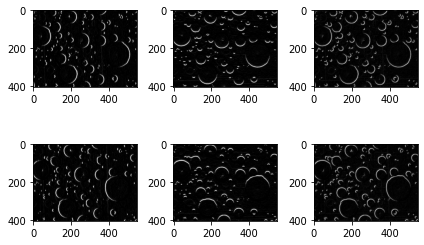

In [ ]:
images = [Gx, Gy, G1, Gu, Gv, G2]
width, height = 255, 255
rows, cols = 2, 3
axes = []
fig = plt.figure()
for i in range(6):
    image = images[i]
    axes.append(fig.add_subplot(rows, cols, i+1))
    plt.imshow(image, cmap='gray')
fig.tight_layout()    
plt.show()

## Final sample result

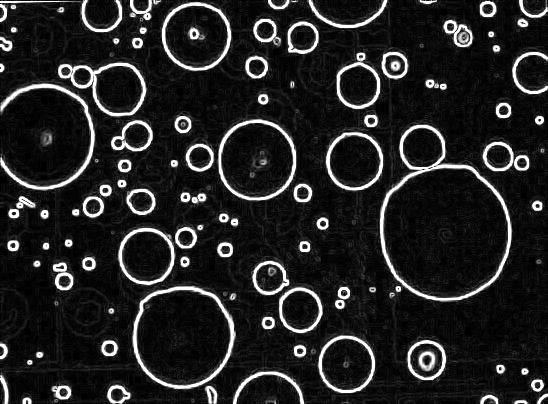

In [ ]:
cv2_imshow(G)

## Practice with RawData

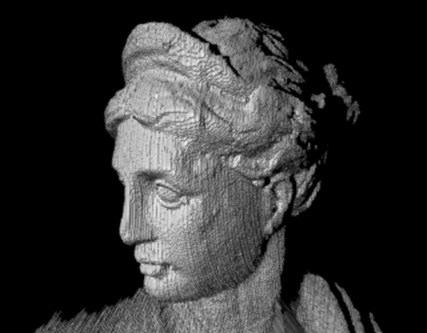

In [ ]:
path_filename = os.path.join(dir_baitap, 'RawData.jpg')
img = cv.imread(path_filename)
cv2_imshow(img)

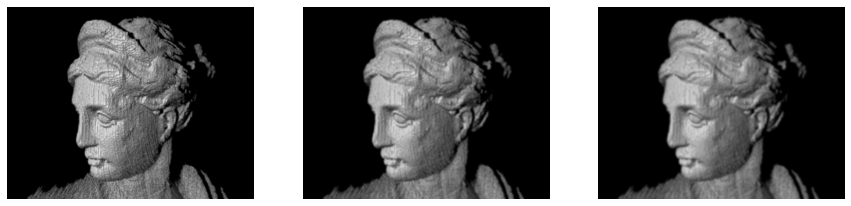

In [ ]:
L1 = np.ones((3, 3)) / 9 
A = cv.filter2D(img, -1, L1)
B = cv.filter2D(A, -1, L1)
# cv2_imshow(cv.resize(A, (200, 150)))
# cv2_imshow(cv.resize(B, (200, 150)))

_, axs3 = plt.subplots(1, 3, figsize=(15, 15))
axs3 = axs3.flatten()
for i, ax in zip([img, A, B], axs3):
    ax.imshow(i)
    ax.axis('off')

plt.show()


##Practice with Barbara

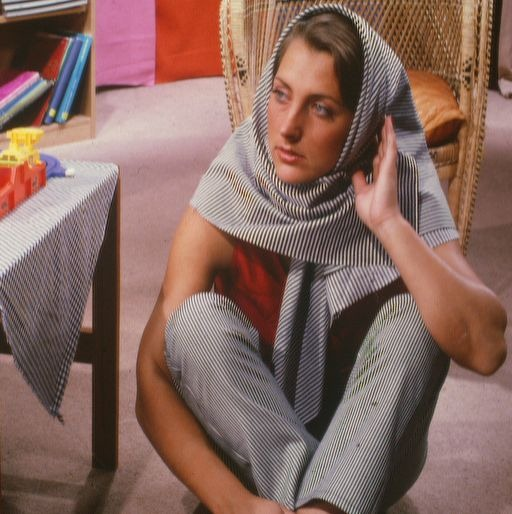

In [ ]:
path_filename = os.path.join(dir_baitap, 'barbara.jpg')
img = cv.imread(path_filename)
cv2_imshow(img)

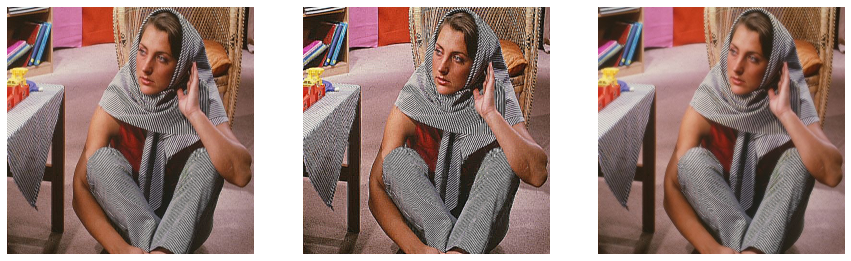

In [ ]:
S1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
S2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
S3 = np.array([[1, -2, 1], [-2, 5, -2], [1, -2, 1]])

img1 = cv.filter2D(img, -1, S1)
img2 = cv.filter2D(img, -1, S2)
img3 = cv.filter2D(img, -1, S3)

_, axs3 = plt.subplots(1, 3, figsize=(15, 15))
axs3 = axs3.flatten()
for i, ax in zip([img1, img2, img3], axs3):
    ax.imshow(cv.cvtColor(i, cv.COLOR_BGR2RGB))
    ax.axis('off')